# Základy vizualizace - v pandas a pro pandas

Jeden obrázek (či graf) někdy dokáže říci více než tisíc slov. U (explorativní) datové analýzy to platí dvojnásob (A jako umí být manipulativní článek o tisíci slovech, o to manipulativnější umí být "vhodně" připravený graf).

V této lekci si ukážeme, jak z dat, která už umíš načíst a se kterými provádíš mnohé aritmetické operace, vykreslíš některé základní typy grafů (sloupcový, spojnicový a bodový).

## Rozmanitý svět vizualizačních knihoven v Pythonu

Zatímco ohledně knihovny pro běžné zpracování tabulkových dat panuje shoda a při zkoumání malých až středně velkých dat nepříliš exotického typu obvykle analytici běžně sahají po `pandas`, knihoven pro vizualizaci dat existuje nepřeberné množství - každá má svoje výhody i nevýhody. My si během lekcí EDA zmíníme tyto tři (a budeme se soustředit především na to, jak je použít společně s pandas):

- `matplotlib` - Toto je asi nejrozšířenější a v mnoha ohledech nejflexibilnější knihovna. Představuje výchozí volbu, pokud potřebuješ dobře vyhlížející statické grafy, které budou fungovat skoro všude. Značná flexibilita je vyvážena někdy ne zcela intuitivními jmény funkcí a argumentů. Pandas ji využívá interně (takže s trochou snahy můžeš předstírat, že o její existenci nevíš). Viz https://matplotlib.org/.

- `seaborn` - Cílem této knihovny je pomoci zejména se statistickými grafy. Staví na matplotlibu, ale překrývá ho "lidskou" tváří. My s ním budeme pracovat při vizualizaci složitějších vztahů mezi více proměnnými. Viz https://seaborn.pydata.org/.

- `plotly` (a zejména její podmnožina `plotly.express`) - Po této knihovně zejména sáhneš, budeš-li chtít do své vizualizace vložit interaktivitu. Ta se samozřejmě obtížně tiskne na papír, ale zejména při práci v Jupyter notebooku umožní vše zkoumat výrazně rychleji. Viz https://plot.ly/python/.

Pro zájemce o bližší vysvětlení doporučujeme podívat se na (již poněkud starší) video od J. Vanderplase: Python Visualizations' Landscape (https://www.youtube.com/watch?v=FytuB8nFHPQ), které shrnuje základní vlastnosti jednotlivých knihoven.


In [12]:
%matplotlib inline

# Co to má znamenat!?

Jestli ses dosud tvářil/a, že nevíš o existenci matplotlibu, teď už nemůžeš :-). Tato mysteriózní řádka (ve skutečnosti "IPython magic command") říká, že všechny grafy se automaticky vykreslí přímo do notebooku (to vůbec není samozřejmé a lekcdy to ani nechceme - třeba když chceme grafy ukládat rovnou do souboru nebo interaktivně mimo notebook).

Více viz https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib.


## Příprava - zdroj dat

Nejdříve si načteme nám již známá data se zeměmi světa. Přidáme k tomu i tabulku s vývojem některý ukazatelů v čase pro Českou republiku.

In [22]:
import pandas as pd

# TODO: opravit podle toho, jak to bude

# Světová data
url = "https://raw.githubusercontent.com/janpipek/data-pro-pyladies/master/data/countries.csv"
countries = pd.read_csv(url).set_index("name")

# Česká data
url = "https://raw.githubusercontent.com/janpipek/data-pro-pyladies/master/data/cze.csv"
czech = pd.read_csv(url)

## Sloupcový graf (bar plot)

Úplně nejjednodušší graf, který můžeš vytvořit, je **sloupcový**. Vedle sebe postupně zobrazíš sloupečky vysoké podle vlastnosti, která tě zajímá.

<div class="note">.plot</div>

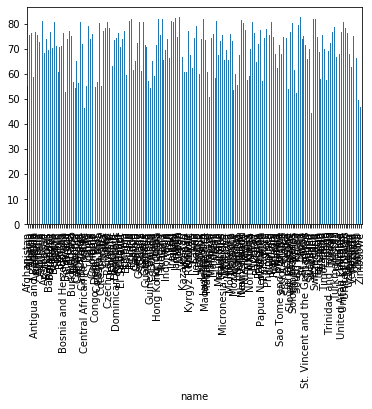

In [32]:
countries["life_expectancy_years"].plot.bar();

Uf, to nevypadá úplně nejpřehledněji. Zkusme totéž, jen pro země Evropské Unie (kterých bylo v době psaní kurzu stále ještě 28).

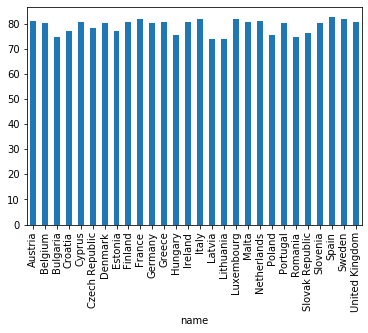

In [33]:
eu_countries = countries.query("is_eu")    # Filtrování
eu_countries["life_expectancy_years"].plot.bar();

**Úkol:** Zkus si nakreslit sloupcový graf některé z dalších charakteristik ("sloupců") zemí (ať už evropských, nebo filtrováním přes nějaký region) a zamysli se nad tím, jakou výpovědní hodnotu takový graf má (někdy prachbídnou).

In [35]:
eu_countries["eu_accession"].plot.bar();

TypeError: no numeric data to plot

## Bodový graf (scatter plot)

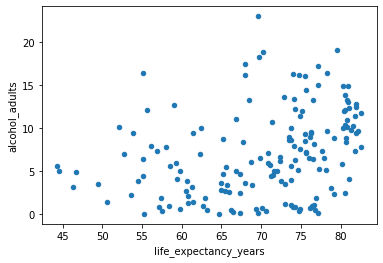

In [34]:
countries.plot.scatter(x="life_expectancy_years", y="alcohol_adults");

V podstatě téhož bychom dosáhli použitím "čistého" matplotibu.

In [6]:
fig, ax = plt.subplots()
ax.scatter(countries["life_expectancy_years"], countries["alcohol_adults"])
ax.set_xlabel("life_expectancy_years")
ax.set_ylabel("alcohol_adults");

NameError: name 'plt' is not defined

Kde se více pije, tam se lépe žije...

## Spojnicový graf (line plot)

Tento druh grafu má smysl zejména tehdy, pokud se nějaká proměnná vyvíjí spojitě v závislosti na proměnné jiné. Časové řady jsou pro to skvělým příkladem

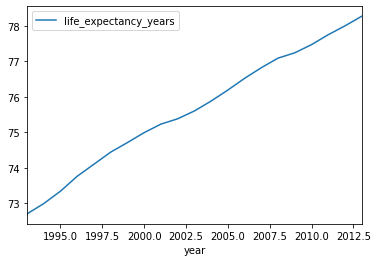

In [15]:
czech.plot.line(x="year", y="life_expectancy_years")

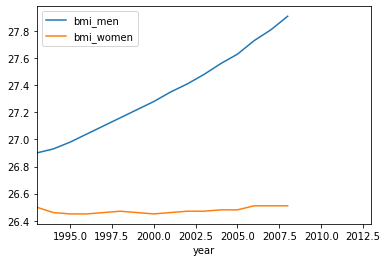

In [16]:
czech.plot.line(x="year", y=["bmi_men", "bmi_women"]);

Naopak nemá moc smysl pomocí čárový graf používat v případě, že na sobě dvě proměnné nejsou přímo závislé, nebo se nevyvíjí společně. Zkus například na,a

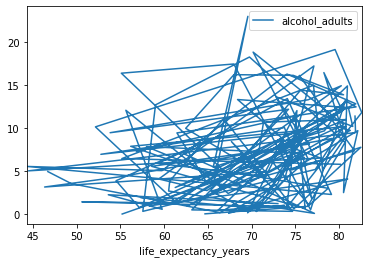

In [17]:
# Hide
countries.plot.line(x="life_expectancy_years", y="alcohol_adults")

Můžeš namítnout, že 

,name,life_expectancy_years,alcohol_adults
90,Lesotho,44.32,5.56
150,Swaziland,44.50,5.05
30,Central African Republic,46.34,3.17
176,Zimbabwe,46.71,4.96
175,Zambia,49.40,3.56
...,...,...,...
55,France,81.95,12.48
69,"Hong Kong, China",81.99,NaN
78,Italy,82.15,9.72
80,Japan,82.50,7.79


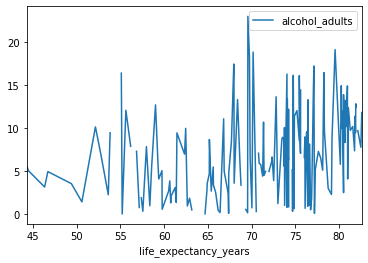

In [18]:
sorted_countries = countries.sort_values("life_expectancy_years")
sorted_countries.plot.line(x="life_expectancy_years", y="alcohol_adults")
sorted_countries[["name", "life_expectancy_years", "alcohol_adults"]]

Dává to smysl? Zdá se, že ne. Ono totiž 

## Bonus 1: seaborn

Složitou statistikou jsme se zatím nezabývali, a tak si zatím vystačíme s něčím opravdu jednoduchým.

In [19]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))

# TODO: změnit
sns.scatterplot(
    data=countries,
    x="alcohol_adults",
    y="life_expectancy_years",
    size="population",
    hue="world_4region"
)

NameError: name 'plt' is not defined

Mnoho ukázkových vizualací najdeš na stránkách samotného projektu: https://seaborn.pydata.org/examples/index.html

## Bonus 2: plotly.(express)

In [ ]:
import plotly.express as px

eu_countries = countries[countries["is_eu"]]

px.scatter(
    countries,
    x="alcohol_adults",
    y="life_expectancy_years",
    size="population",
    color="world_4region",
    hover_name="name"
)

In [ ]:
px.choropleth(countries, locations="iso_alpha", color="life_expectancy_years", hover_name="name")

In [ ]:
https://plot.ly/python/plotly-express/

## Bonus 3 - další vizualizační knihovny

In [ ]:
# TODO: Doplnit